In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_raw = pd.read_csv('./data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [3]:
groups = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
columns_to_drop = [f'{group}{i}' for group in groups for i in range(5, 11)]
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data.drop(columns_to_drop, axis=1, inplace=True)
data.head()


,EXT1,EXT2,EXT3,EXT4,EST1,EST2,EST3,EST4,AGR1,AGR2,AGR3,AGR4,CSN1,CSN2,CSN3,CSN4,OPN1,OPN2,OPN3,OPN4,country
0,4.0,1.0,5.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,2.0,4.0,3.0,4.0,3.0,2.0,5.0,1.0,4.0,1.0,GB
1,3.0,5.0,3.0,4.0,2.0,3.0,4.0,1.0,1.0,4.0,1.0,5.0,3.0,2.0,5.0,3.0,1.0,2.0,4.0,2.0,MY
2,2.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,1.0,4.0,1.0,4.0,4.0,2.0,2.0,2.0,5.0,1.0,2.0,1.0,GB
3,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,5.0,2.0,GB
4,3.0,3.0,3.0,3.0,1.0,5.0,5.0,3.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,KE


In [4]:
data['country']


0          GB
1          MY
2          GB
3          GB
4          KE
           ..
1015336    US
1015337    US
1015338    US
1015339    US
1015340    US
Name: country, Length: 1015341, dtype: object

In [5]:
countries = pd.DataFrame(data['country'].value_counts())
countries

,count
country,
US,546403
GB,66596
CA,61849
AU,50030
PH,19847
...,...
TD,1
NE,1
MF,1


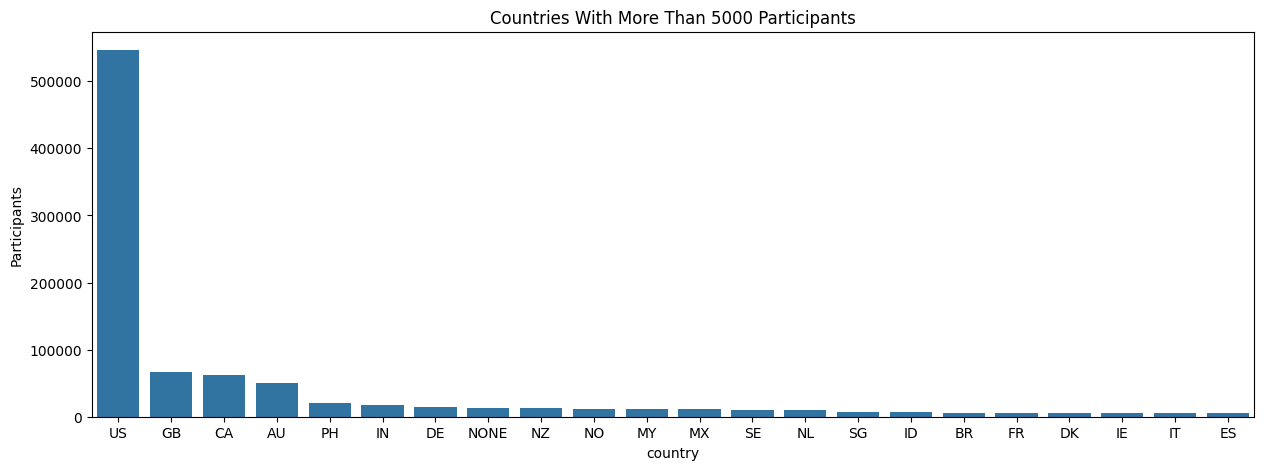

In [8]:
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['count'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='count')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants')
plt.show()


In [9]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 }

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 }

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 }

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 }

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 }

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [10]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 5):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


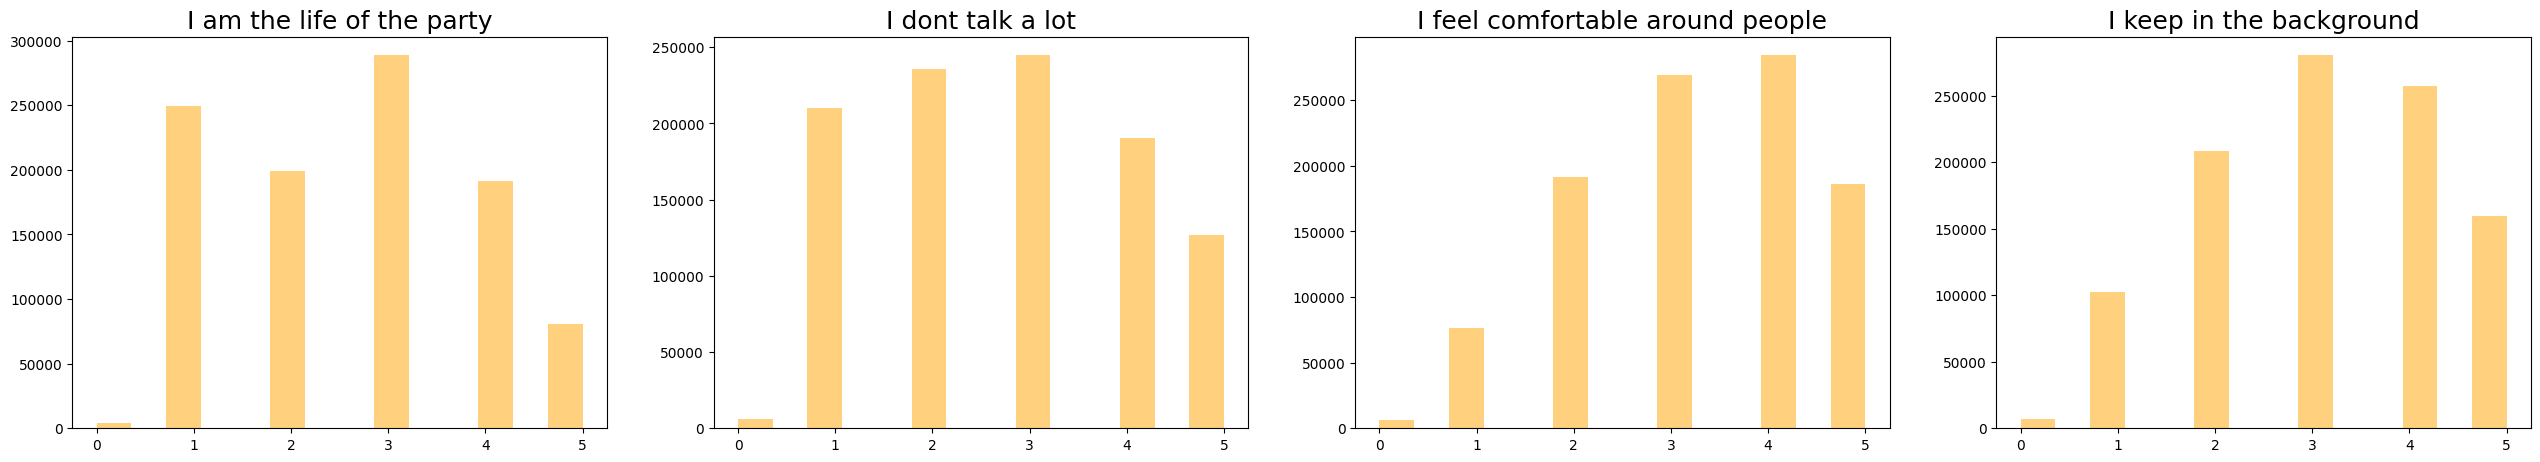

In [11]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


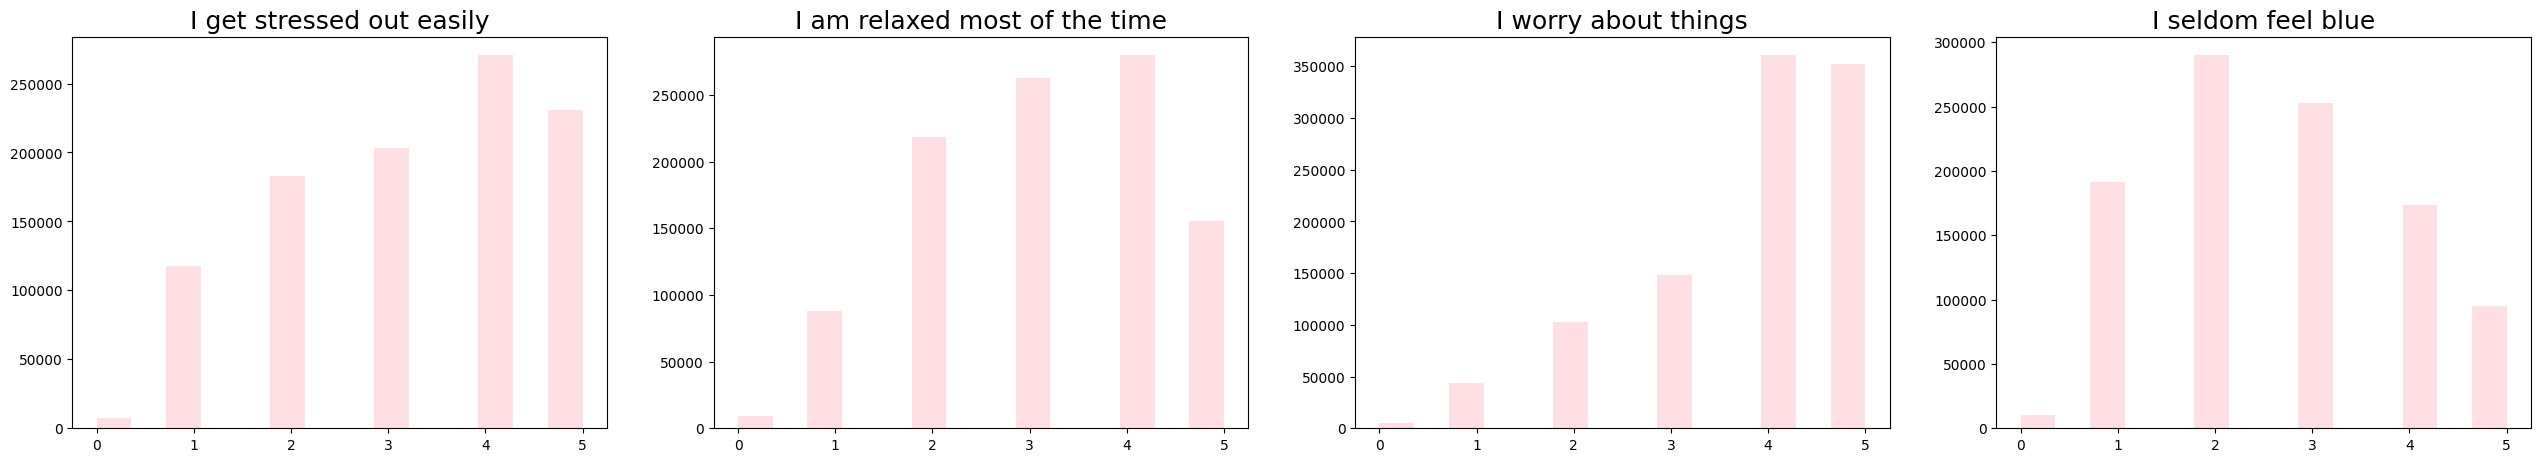

In [12]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


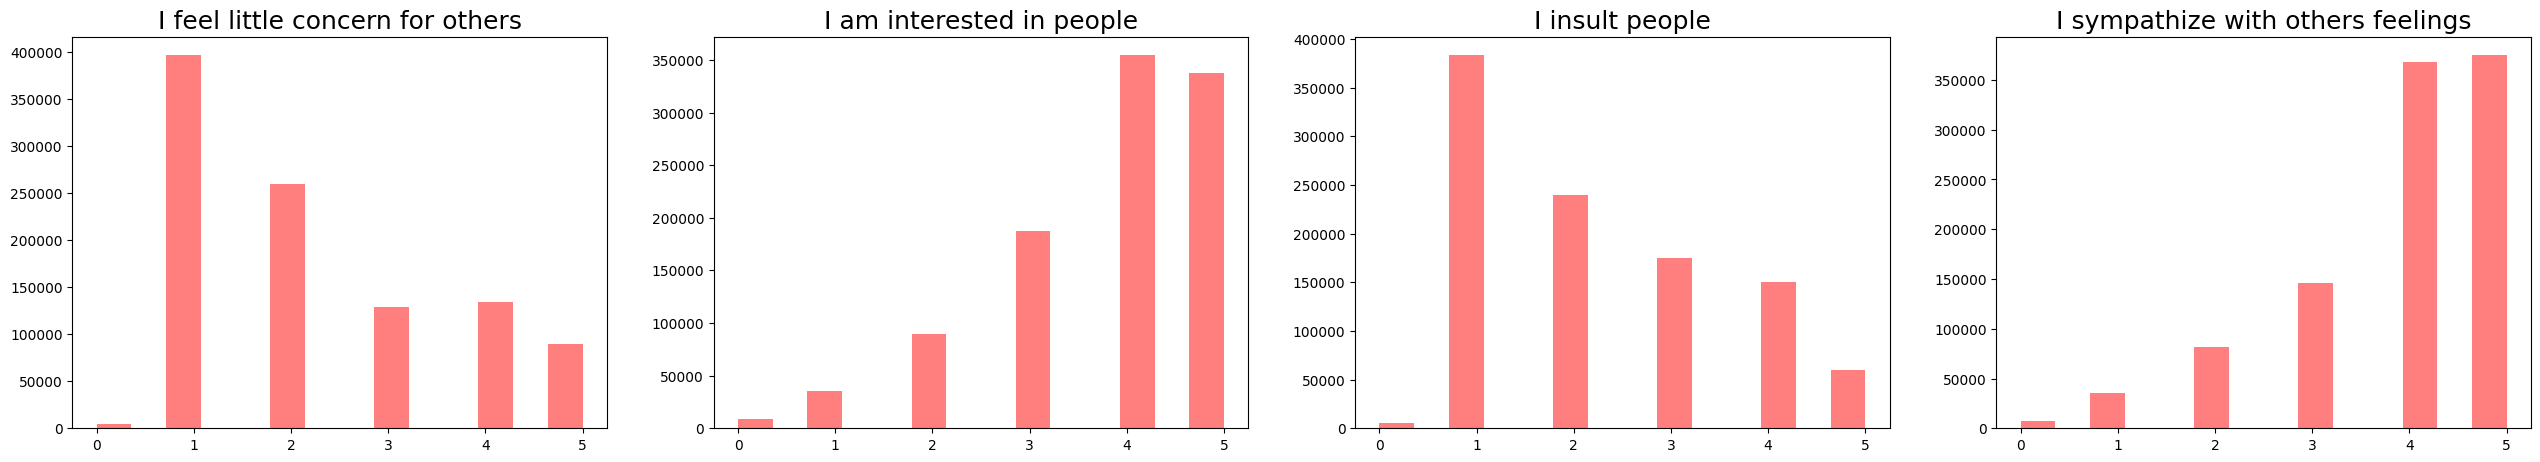

In [13]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


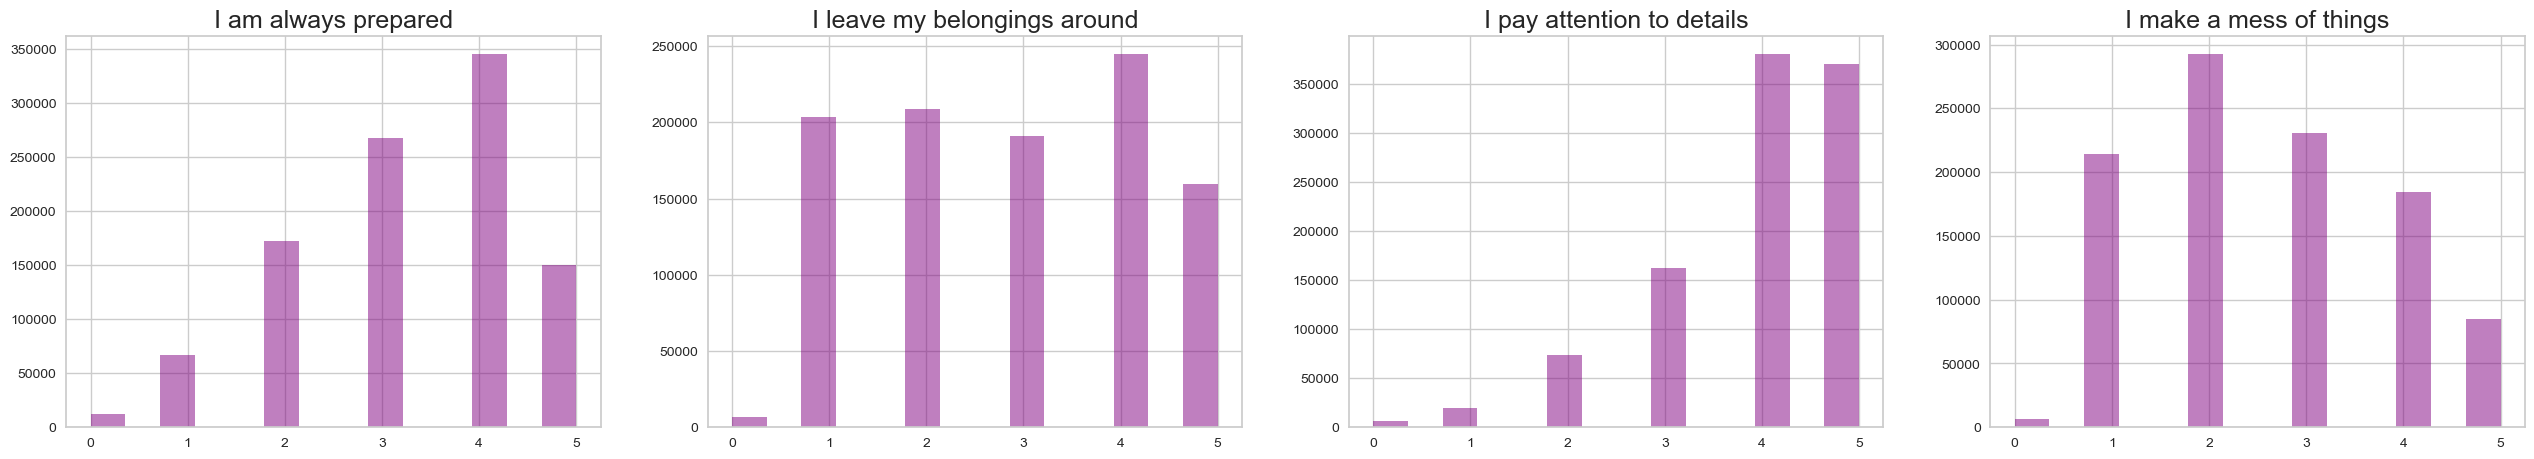

In [50]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


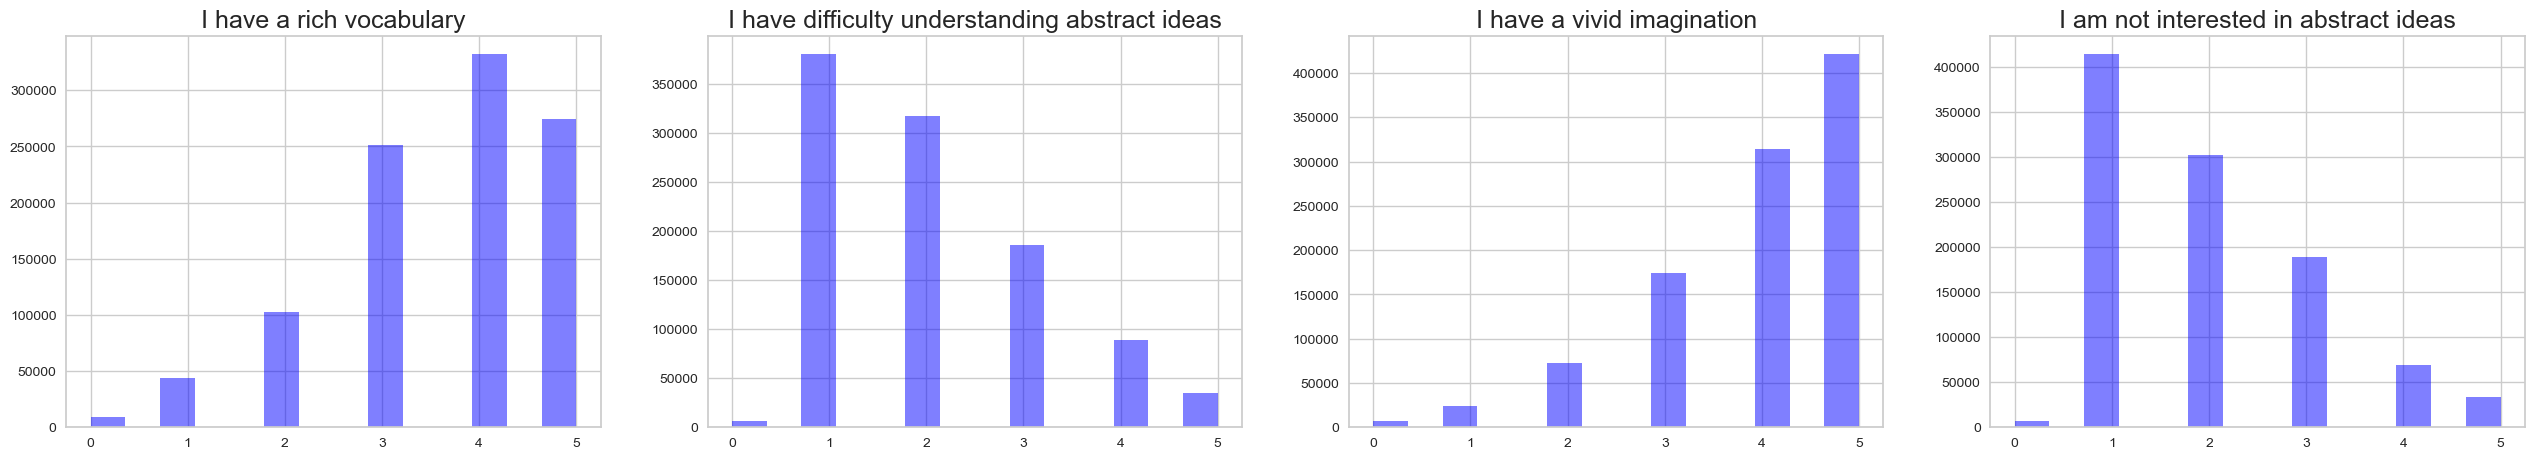

In [51]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

In [52]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]
df_sample 

,EXT1,EXT2,EXT3,EXT4,EST1,EST2,EST3,EST4,AGR1,AGR2,AGR3,AGR4,CSN1,CSN2,CSN3,CSN4,OPN1,OPN2,OPN3,OPN4
0,0.8,0.2,1.0,0.4,0.2,0.8,0.8,0.4,0.4,1.0,0.4,0.8,0.6,0.8,0.6,0.4,1.0,0.2,0.8,0.2
1,0.6,1.0,0.6,0.8,0.4,0.6,0.8,0.2,0.2,0.8,0.2,1.0,0.6,0.4,1.0,0.6,0.2,0.4,0.8,0.4
2,0.4,0.6,0.8,0.8,0.8,0.8,0.8,0.4,0.2,0.8,0.2,0.8,0.8,0.4,0.4,0.4,1.0,0.2,0.4,0.2
3,0.4,0.4,0.4,0.6,0.6,0.6,0.6,0.4,0.4,0.8,0.6,0.8,0.4,0.8,0.8,0.8,0.8,0.4,1.0,0.4
4,0.6,0.6,0.6,0.6,0.2,1.0,1.0,0.6,0.2,1.0,0.2,1.0,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.2,1.0,0.6,1.0,0.4,0.8,1.0,0.4,0.2,0.8,0.2,1.0,0.6,0.4,0.8,0.8,0.4,0.2,1.0,0.2
4996,0.2,1.0,0.6,0.6,0.4,0.8,0.8,0.8,0.4,1.0,0.4,1.0,0.6,0.8,0.8,1.0,0.8,0.2,0.4,0.2
4997,0.8,0.2,0.8,0.2,1.0,0.4,1.0,0.6,0.4,0.8,0.6,0.6,0.8,0.8,0.8,0.4,1.0,0.2,1.0,0.2
4998,0.2,1.0,0.6,0.6,1.0,0.4,0.8,0.6,0.2,0.8,0.2,1.0,0.6,1.0,0.6,1.0,0.4,0.6,1.0,0.4


d:\Users\ncmin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\ncmin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\ncmin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\ncmin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\ncmin\anaconda3\Lib\site-packages\sklearn\clust

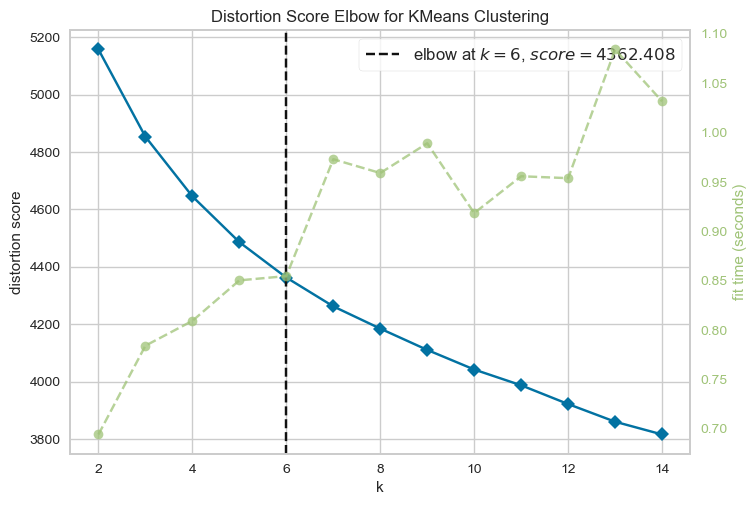

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [54]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)
df_model 

d:\Users\ncmin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,EXT1,EXT2,EXT3,EXT4,EST1,EST2,EST3,EST4,AGR1,AGR2,AGR3,AGR4,CSN1,CSN2,CSN3,CSN4,OPN1,OPN2,OPN3,OPN4
0,4.0,1.0,5.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,2.0,4.0,3.0,4.0,3.0,2.0,5.0,1.0,4.0,1.0
1,3.0,5.0,3.0,4.0,2.0,3.0,4.0,1.0,1.0,4.0,1.0,5.0,3.0,2.0,5.0,3.0,1.0,2.0,4.0,2.0
2,2.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,1.0,4.0,1.0,4.0,4.0,2.0,2.0,2.0,5.0,1.0,2.0,1.0
3,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,5.0,2.0
4,3.0,3.0,3.0,3.0,1.0,5.0,5.0,3.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0
1015337,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,2.0,4.0,1.0,4.0,3.0,2.0,3.0,4.0,4.0,1.0,5.0,1.0
1015338,4.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,3.0,5.0,5.0,3.0,4.0,5.0,3.0,5.0,5.0,1.0,5.0,1.0
1015339,2.0,4.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,5.0,2.0,4.0,2.0


In [55]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EST1,...,OPN1,OPN2,OPN3,OPN4,Clusters
0,4.0,1.0,5.0,2.0,1.0,...,5.0,1.0,4.0,1.0,3
1,3.0,5.0,3.0,4.0,2.0,...,1.0,2.0,4.0,2.0,4
2,2.0,3.0,4.0,4.0,4.0,...,5.0,1.0,2.0,1.0,4
3,2.0,2.0,2.0,3.0,3.0,...,4.0,2.0,5.0,2.0,1
4,3.0,3.0,3.0,3.0,1.0,...,5.0,1.0,5.0,1.0,3


In [56]:
df_model.Clusters.value_counts()


Clusters
0    226461
4    215262
3    200131
1    194230
2    177397
Name: count, dtype: int64

In [57]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EST1,EST2,EST3,EST4,AGR1,AGR2,AGR3,AGR4,CSN1,CSN2,CSN3,CSN4,OPN1,OPN2,OPN3,OPN4
Clusters,,,,,,,,,,,,,,,,,,,,
0,3.605354,1.750032,3.938502,2.359236,3.805936,2.989826,4.254331,2.497984,2.137163,4.328975,2.701119,4.183400,2.950499,3.745400,3.801242,3.257104,3.663041,2.193989,4.185970,2.043416
1,1.736591,3.663677,2.214277,4.131478,4.218730,2.471971,4.526855,2.069124,2.321804,3.469732,2.565670,3.927869,2.710338,3.739103,3.837342,3.668820,3.703516,2.183592,4.224224,1.933357
2,2.212168,3.354087,2.769196,3.427578,2.348670,3.619830,3.017768,2.917716,3.290822,2.856734,2.643252,2.782787,3.185984,2.682683,3.662959,2.393778,3.346443,2.157511,3.532281,2.226701
3,3.354818,2.077974,4.279872,2.343140,2.027932,4.030935,2.918244,3.405544,1.822716,4.410591,1.768911,4.246184,3.716651,2.540871,4.196476,1.836602,3.949653,1.661362,4.096632,1.725585
4,2.165696,3.213298,3.079647,3.573287,3.839382,2.795036,4.349328,2.475764,1.868472,3.897725,1.660641,4.305084,3.896888,1.909092,4.334555,1.908163,3.581338,2.172831,3.897910,2.082276


In [59]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:4]
est = col_list[4:8]
agr = col_list[8:12]
csn = col_list[12:16]
opn = col_list[16:20]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,1.165312,1.354808,1.335066,1.375424,1.208642
1,1.174602,1.328668,1.228507,1.395560,1.204469
2,1.176303,1.190398,1.157359,1.192540,1.126294
3,1.205580,1.238265,1.224840,1.229060,1.143323
4,1.203193,1.345951,1.173192,1.204870,1.173436


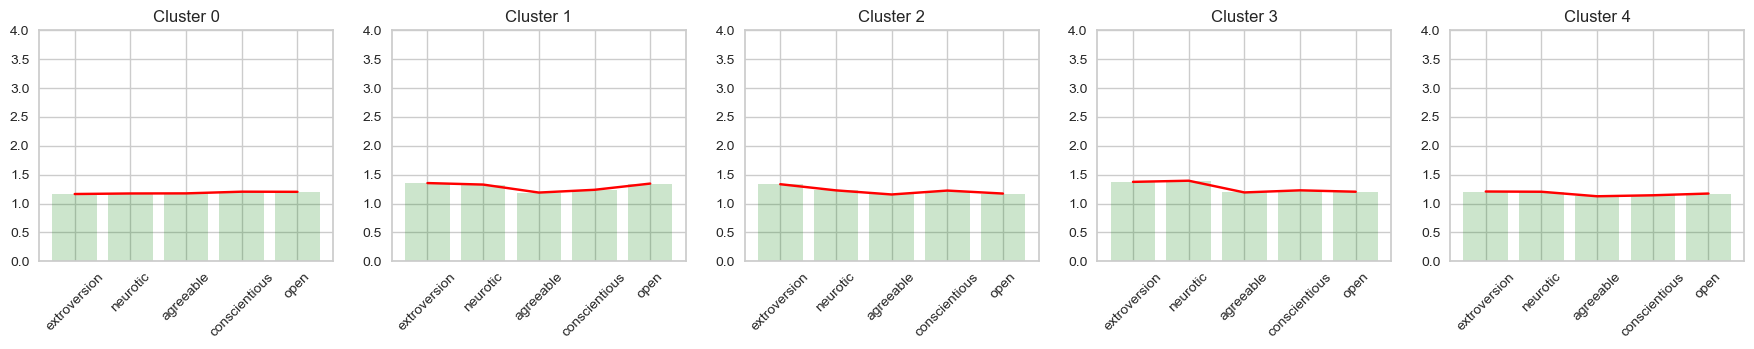

In [60]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [61]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,2.569962,2.732954,3
1,0.918123,-2.379097,4
2,1.711975,-1.611402,4
3,-1.834311,1.043761,1
4,3.867464,-0.761173,3


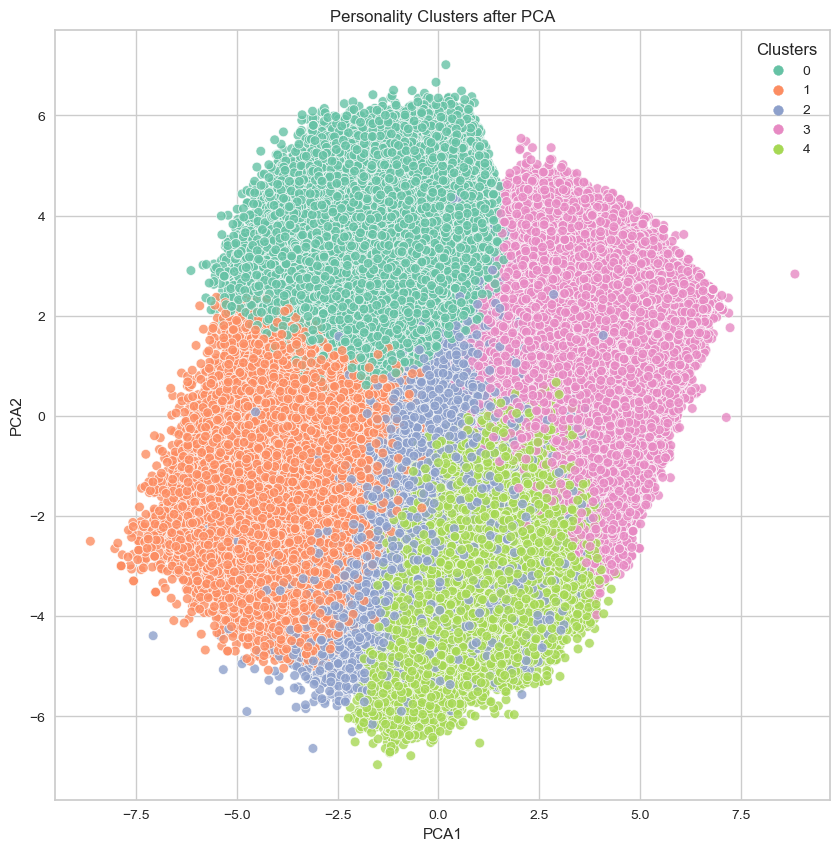

In [62]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Giả sử 'clusters' là biến mục tiêu của bạn
y = df_model['Clusters']

# X là tất cả các cột khác
X = df_model.drop('Clusters', axis=1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Logistic Regression
log_reg = LogisticRegression()

# Huấn luyện mô hình
log_reg.fit(X_train, y_train)

# Dự đoán nhóm tính cách cho tập kiểm tra
predictions = log_reg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dự đoán nhóm tính cách cho tập kiểm tra
predictions = log_reg.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy*100:.2f}%')
 
print('Classification Report:')
print(classification_report(y_test, predictions))

# In ma trận nhầm lẫn
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))


d:\Users\ncmin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 98.79%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     45053
           1       0.99      0.99      0.99     38953
           2       0.98      0.99      0.99     35606
           3       0.99      0.99      0.99     39849
           4       0.99      0.98      0.99     43236

    accuracy                           0.99    202697
   macro avg       0.99      0.99      0.99    202697
weighted avg       0.99      0.99      0.99    202697

Confusion Matrix:
[[44563   110    36   218   126]
 [   13 38581    70     1   288]
 [   93   112 35177    90   134]
 [  272     3   168 39380    26]
 [  192   186   265    46 42547]]


In [64]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier()

# Huấn luyện mô hình
rf.fit(X_train, y_train)

# Dự đoán nhóm tính cách cho tập kiểm tra
predictions = rf.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 91.34%


In [65]:

my_data = pd.DataFrame([{
    'EXT1' : 5, 'EXT2' : 5, 'EXT3' : 5, 'EXT4' : 5,
    'EST1' : 1, 'EST2' : 5, 'EST3' : 1, 'EST4' : 4,
    'AGR1' : 2, 'AGR2' : 5, 'AGR3' : 1, 'AGR4' : 5, 
    'CSN1' : 5, 'CSN2' : 4, 'CSN3' : 0, 'CSN4' : 1, 
    'OPN1' : 5, 'OPN2' : 2, 'OPN3' : 1, 'OPN4' : 1, 
}])

# Sử dụng mô hình Logistic Regression để dự đoán nhóm tính cách cho dữ liệu đầu vào
#my_personality = rf.predict(my_data)

extroversion: 1.00%
neurotic: 0.00%
agreeable: 11.00%
conscientious: 86.00%
open: 2.00%


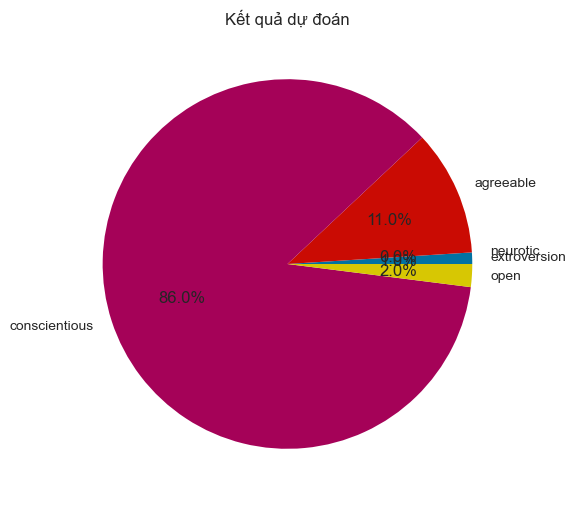

In [69]:
# Sử dụng mô hình Random Forest để dự đoán xác suất cho mỗi nhóm tính cách
personality_probabilities = rf.predict_proba(my_data)

# In xác suất cho mỗi nhóm tính cách
personality_labels = ['extroversion', 'neurotic', 'agreeable', 'conscientious', 'open']
for i in range(len(personality_labels)):
    print(f'{personality_labels[i]}: {personality_probabilities[0][i]*100:.2f}%')
# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 6))
plt.pie(personality_probabilities[0], labels=personality_labels, autopct='%1.1f%%')
plt.title('Kết quả dự đoán')
plt.show()

In [28]:
from joblib import dump
dump(rf, 'personality_prediction_model.joblib')


['personality_prediction_model.joblib']